#Import necessary libraries

In [1]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score

#Get data from API

In [2]:
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=1000'
res=requests.get(url+'&api_key=7914f83e252f030f76e4d5b6dd83f99694292f397ca28d9ff82be31d3d792f12')
df = pd.DataFrame(json.loads(res.content)['Data']['Data'])
df = df.set_index('time')
df.index = pd.to_datetime(df.index,unit='s')
target_col='close'

#Exploratory Data Analysis

In [3]:
df.head(5)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2020-08-23,11713.62,11521.60,11670.42,33405.25,3.883088e+08,11651.52,direct,
2020-08-24,11827.45,11594.64,11651.52,39119.97,4.593661e+08,11756.40,direct,
2020-08-25,11767.64,11130.36,11756.40,50836.08,5.837862e+08,11330.56,direct,
2020-08-26,11542.65,11259.23,11330.56,27168.29,3.099864e+08,11466.89,direct,
2020-08-27,11591.64,11135.52,11466.89,40978.91,4.649572e+08,11331.02,direct,


In [4]:
df.shape

(1001, 8)

In [5]:
df.describe()

,high,low,open,volumefrom,volumeto,close
count,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000
mean,33864.833247,32046.057782,33003.608991,45744.780539,1.465545e+09,33018.854835
std,15035.894567,14128.839279,14624.589463,28654.511968,1.081537e+09,14610.282381
min,10349.090000,9855.680000,10128.540000,3378.110000,9.085868e+07,10128.540000
25%,20751.670000,19760.560000,20230.810000,27469.690000,7.560449e+08,20233.680000
50%,31305.480000,29466.570000,30404.370000,39433.620000,1.218895e+09,30404.370000
75%,45819.360000,43129.760000,44425.520000,56364.210000,1.820147e+09,44425.520000
max,68978.640000,66312.420000,67549.140000,290986.060000,1.112022e+10,67549.140000


high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
dtype: int64


<Axes: ylabel='time'>

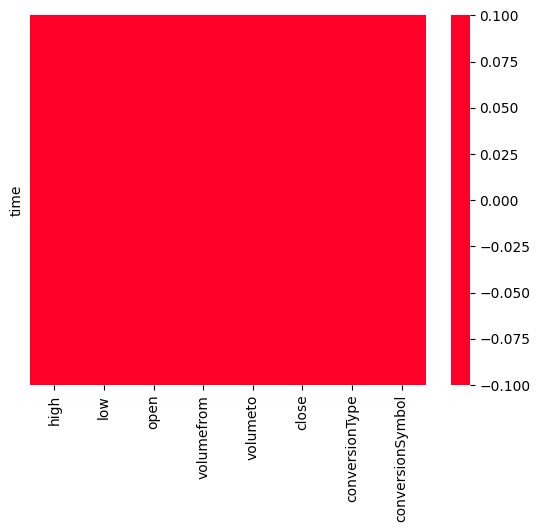

In [6]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels=False,center=0,cmap='gist_rainbow')

In [7]:
relation=df.corr()
relation

<ipython-input-7-9ba8a156669a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relation=df.corr()


,high,low,open,volumefrom,volumeto,close
high,1.000000,0.996505,0.998252,-0.072850,0.503139,0.998101
low,0.996505,1.000000,0.996830,-0.134569,0.441187,0.997749
open,0.998252,0.996830,1.000000,-0.090481,0.485854,0.995732
volumefrom,-0.072850,-0.134569,-0.090481,1.000000,0.769497,-0.101182
volumeto,0.503139,0.441187,0.485854,0.769497,1.000000,0.474746
close,0.998101,0.997749,0.995732,-0.101182,0.474746,1.000000


[Text(0.5, 0, 'high'),
 Text(1.5, 0, 'low'),
 Text(2.5, 0, 'open'),
 Text(3.5, 0, 'volumefrom'),
 Text(4.5, 0, 'volumeto'),
 Text(5.5, 0, 'close')]

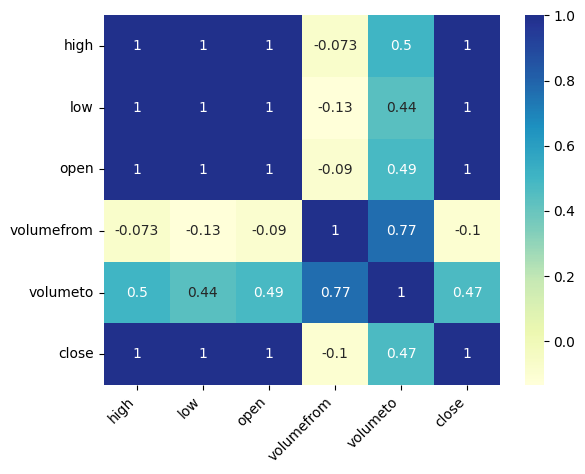

In [8]:
heat_map=sns.heatmap(relation,annot=True,center=0.5,cmap='YlGnBu')
heat_map.set_xticklabels(heat_map.get_xticklabels(),rotation=45,horizontalalignment='right')

In [9]:
df.nunique()

high                1000
low                 1001
open                1001
volumefrom          1001
volumeto            1001
close               1001
conversionType         1
conversionSymbol       1
dtype: int64

In [10]:
df.dtypes

high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
close               float64
conversionType       object
conversionSymbol     object
dtype: object

In [11]:
print(df.iloc[450])

high                     63614.53
low                      58745.71
open                     63614.06
volumefrom               61509.16
volumeto            3740808475.72
close                     60108.9
conversionType             direct
conversionSymbol                 
Name: 2021-11-16 00:00:00, dtype: object


In [12]:
df[df['conversionType']=='invert_divide'].count()

high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
dtype: int64

<Axes: xlabel='conversionType', ylabel='count'>

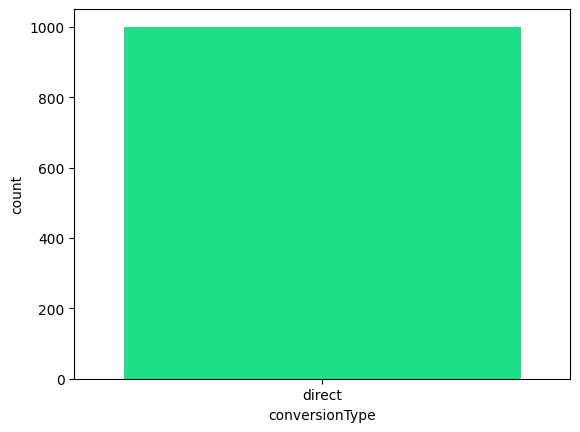

In [13]:
sns.countplot(data=df,x='conversionType',palette='gist_rainbow')

<Axes: xlabel='conversionSymbol', ylabel='count'>

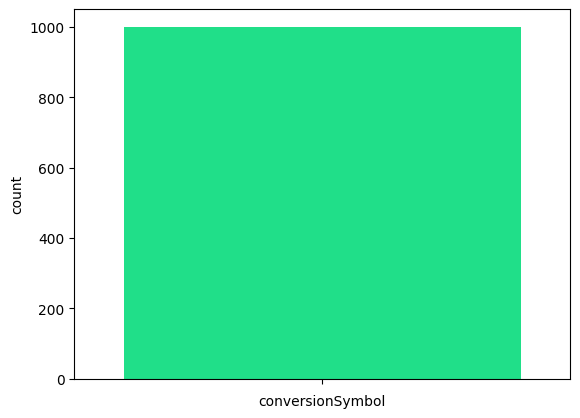

In [14]:
sns.countplot(data=df,x='conversionSymbol',palette='gist_rainbow')

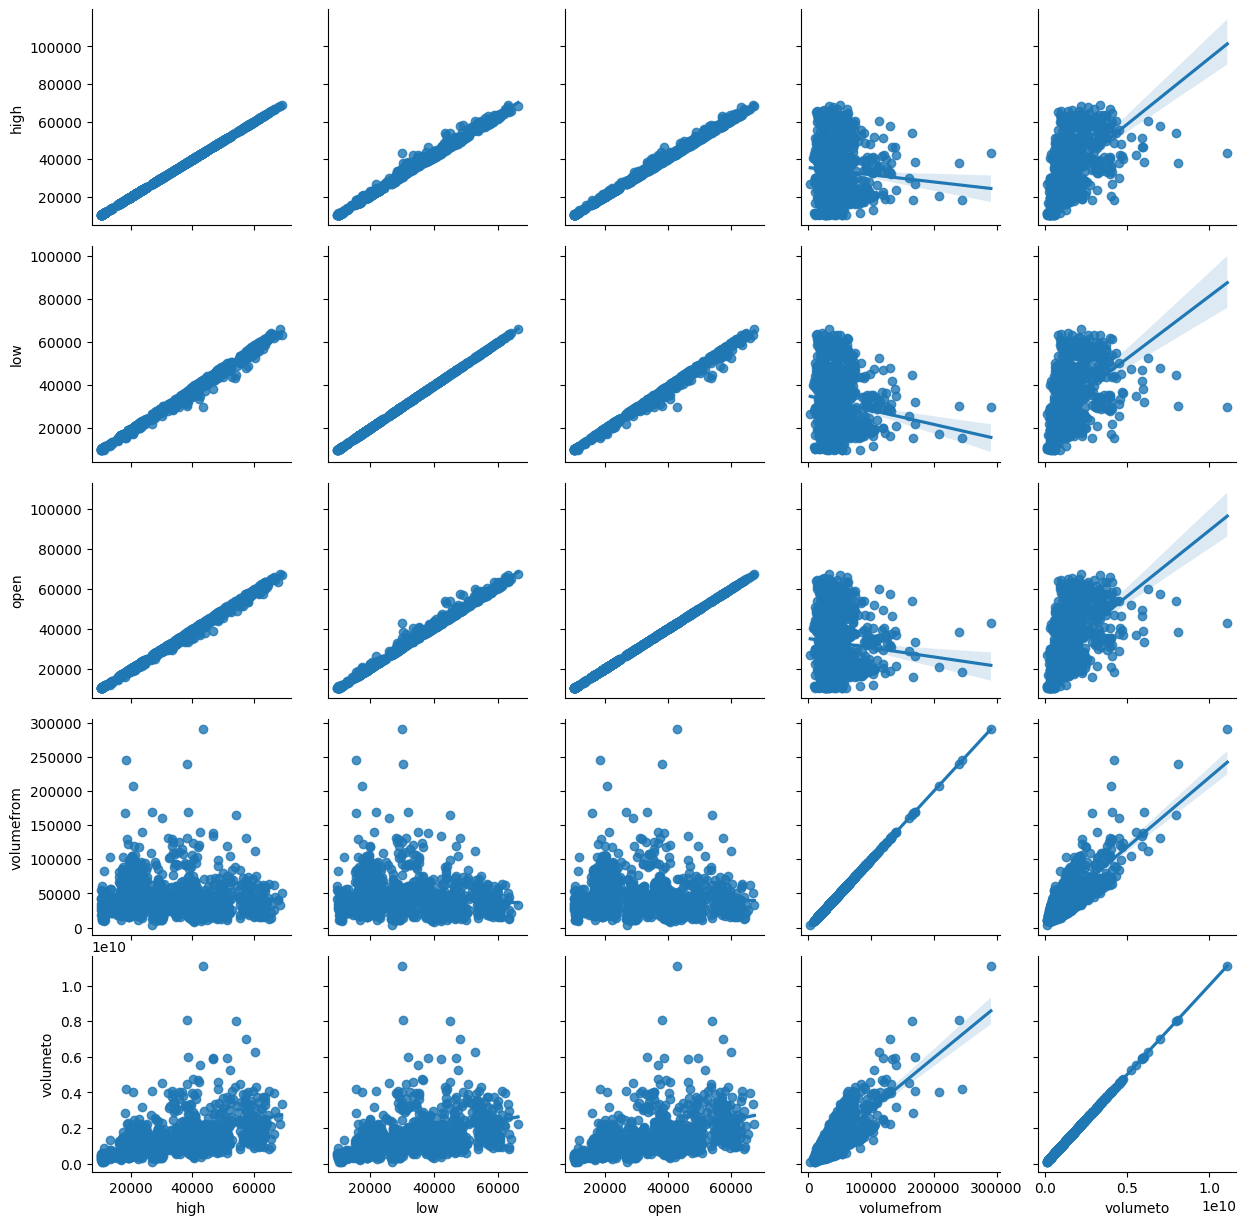

In [15]:
fig=sns.PairGrid(data=df,vars=['high','low','open','volumefrom','volumeto'],palette='gist_rainbow')
fig.map(sns.regplot)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

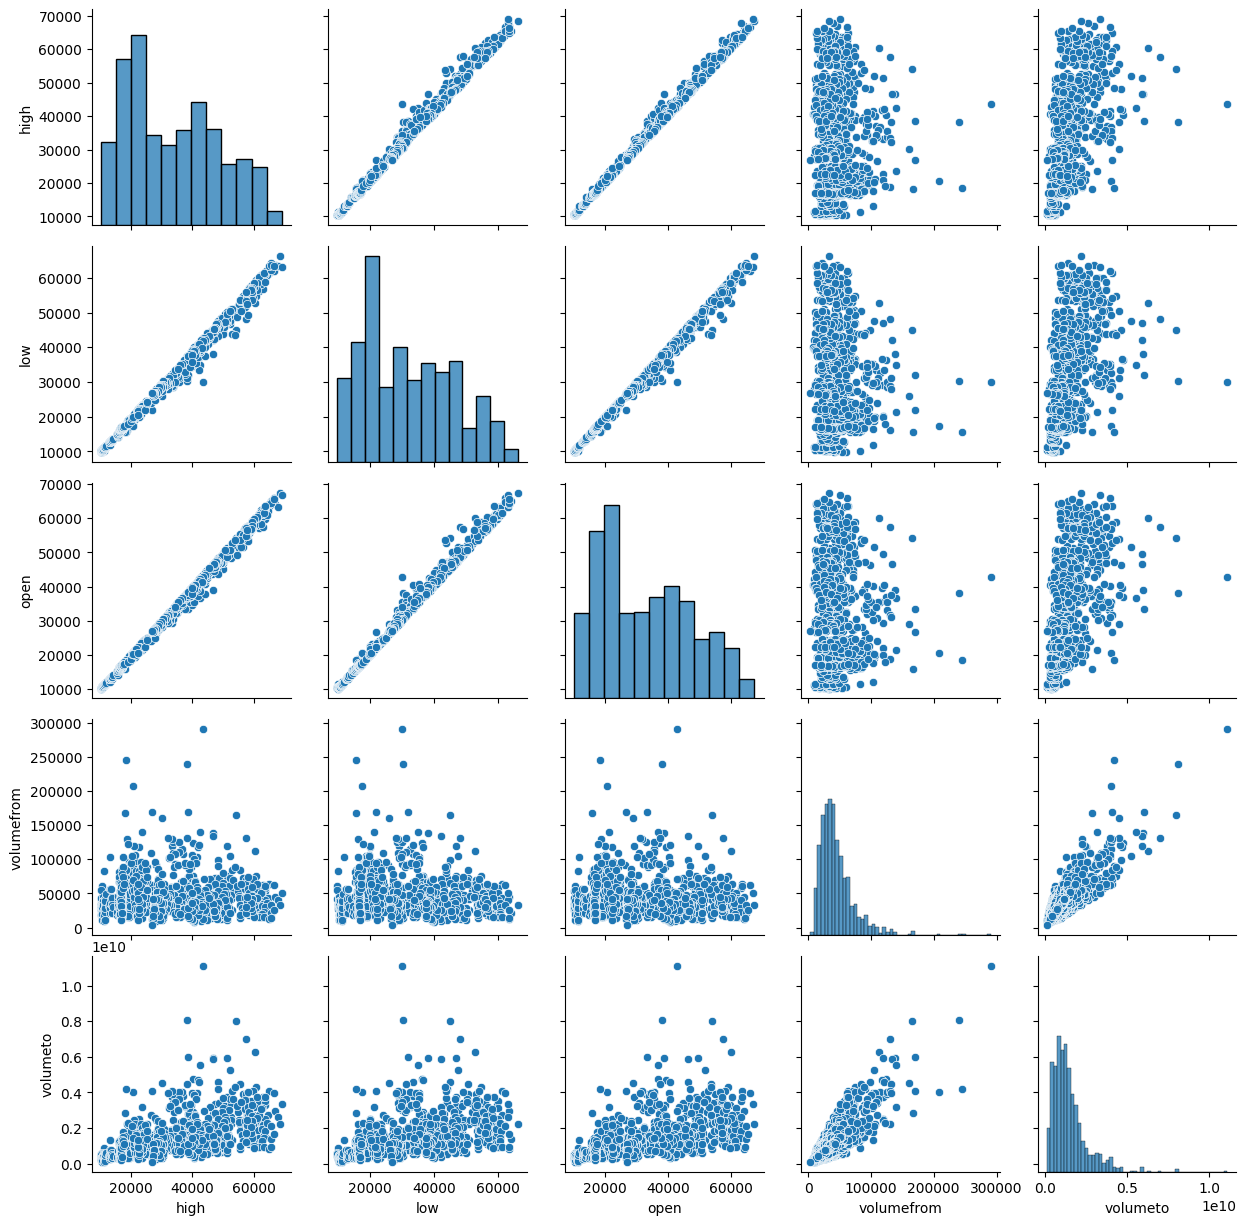

In [16]:
fig=sns.PairGrid(data=df,vars=['high','low','open','volumefrom','volumeto'],palette='gist_rainbow')
fig.map_lower(sns.scatterplot)
fig.map_upper(sns.scatterplot)
fig.map_diag(sns.histplot)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

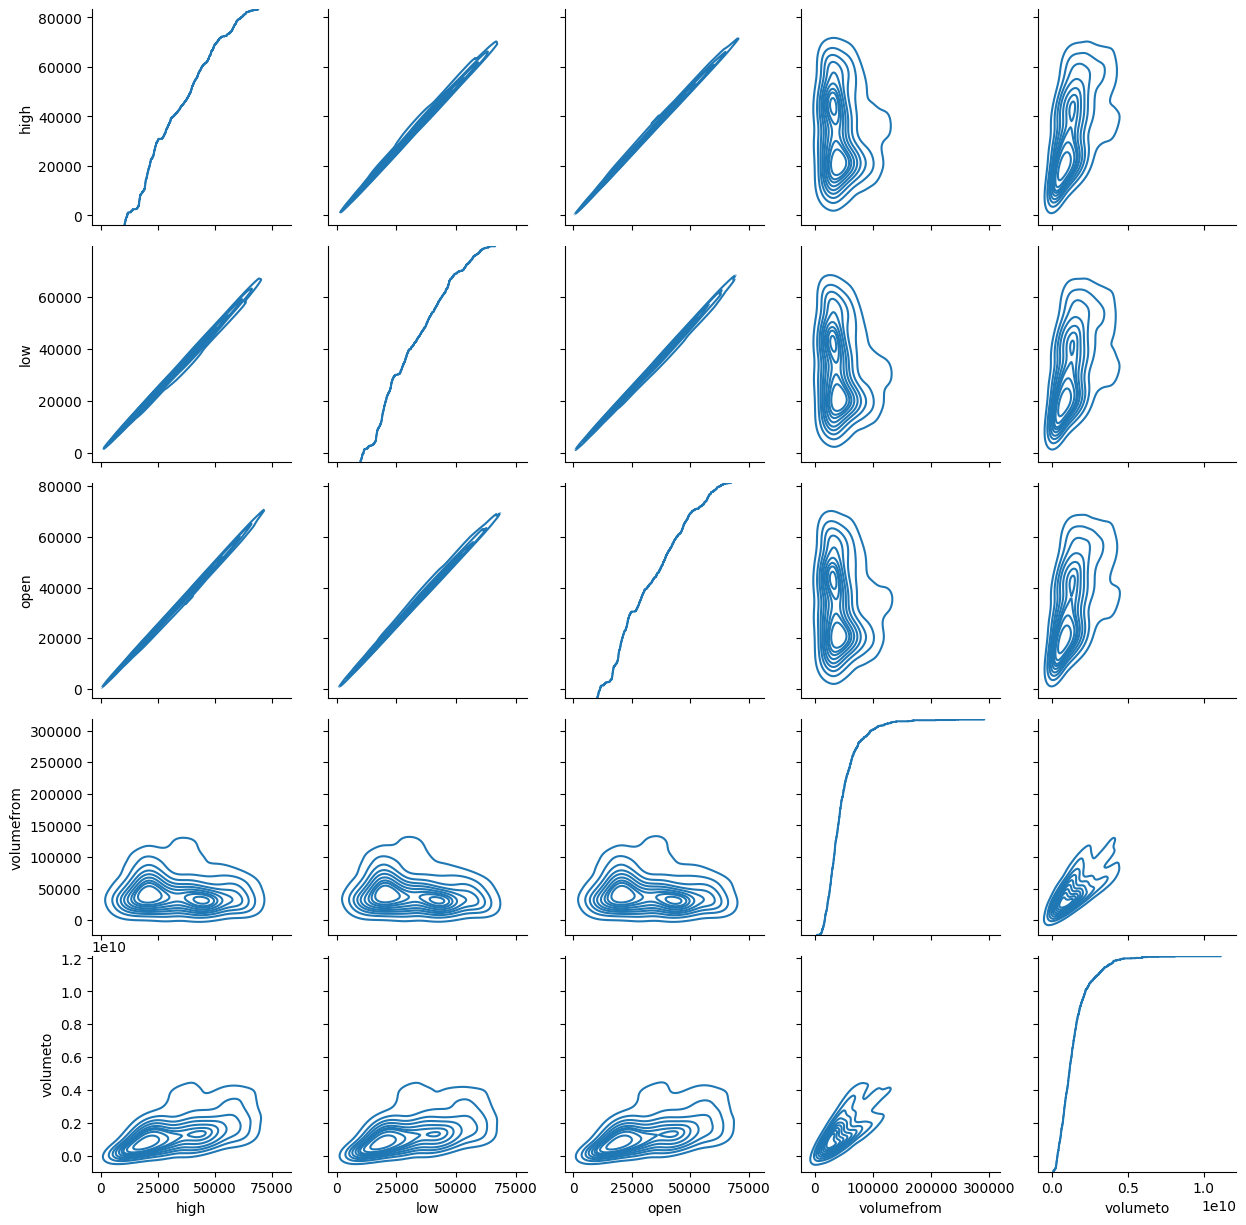

In [17]:
fig=sns.PairGrid(data=df,vars=['high','low','open','volumefrom','volumeto'],palette='gist_rainbow')
fig.map_lower(sns.kdeplot)
fig.map_upper(sns.kdeplot)
fig.map_diag(sns.ecdfplot)

<Axes: xlabel='conversionType', ylabel='open'>

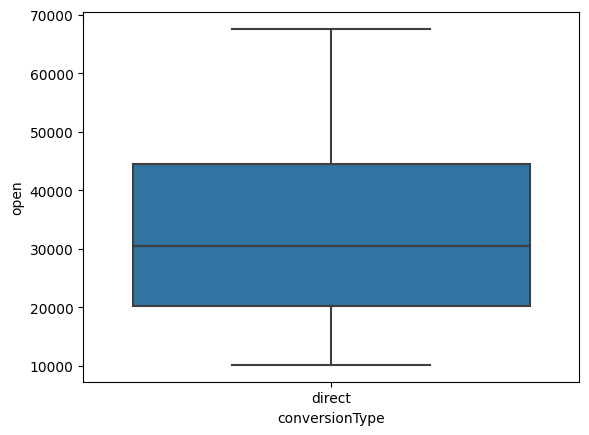

In [18]:
sns.boxplot(x='conversionType',y='open',data=df)

<Axes: xlabel='conversionType', ylabel='high'>

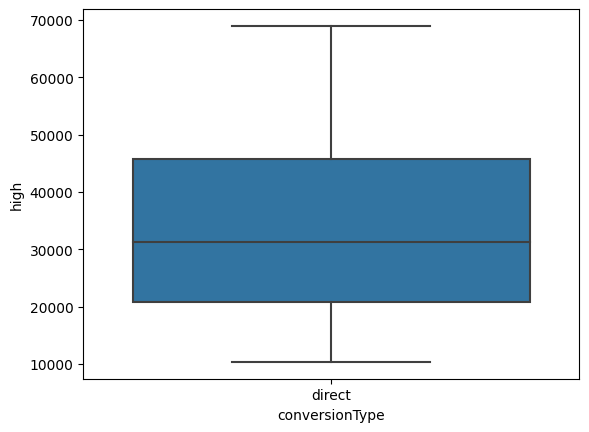

In [19]:
sns.boxplot(x='conversionType',y='high',data=df)

<Axes: xlabel='conversionType', ylabel='low'>

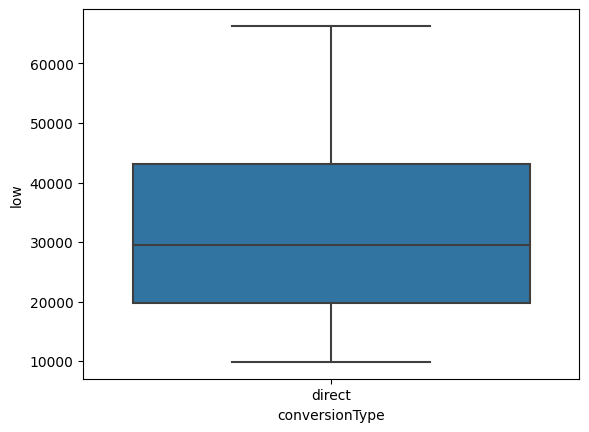

In [20]:
sns.boxplot(x='conversionType',y='low',data=df)

<Axes: xlabel='conversionType', ylabel='volumefrom'>

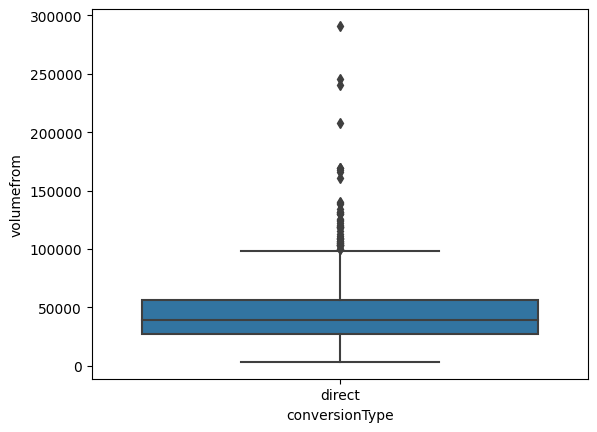

In [21]:
sns.boxplot(x='conversionType',y='volumefrom',data=df)

<Axes: xlabel='conversionType', ylabel='volumeto'>

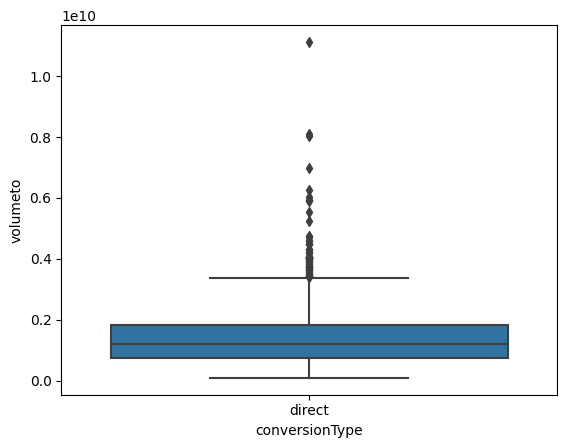

In [22]:
sns.boxplot(x='conversionType',y='volumeto',data=df)

#Data Preparation

In [23]:
df=df.drop(['conversionType','conversionSymbol'],axis='columns')

In [24]:
def train_test_split(data,test_size=0.2):
  split_row=len(data)-int(len(data)*test_size)
  train_data=data.iloc[:split_row]
  test_data=data.iloc[split_row:]
  return train_data,test_data

In [25]:
train,test = train_test_split(df,0.3)

In [26]:
train.shape

(701, 6)

In [27]:
test.shape

(300, 6)

In [28]:
def line_plot(line1,line2,label1=None,label2=None,title='',lw=2):
  fig,ax=plt.subplots(1,figsize=(13,7))
  ax.plot(line1,label=label1,linewidth=lw)
  ax.plot(line2,label=label2,linewidth=lw)
  ax.set_ylabel('price [cad]',fontsize=16)
  ax.set_title(title,fontsize=18)
  ax.legend(loc='best',fontsize=18)

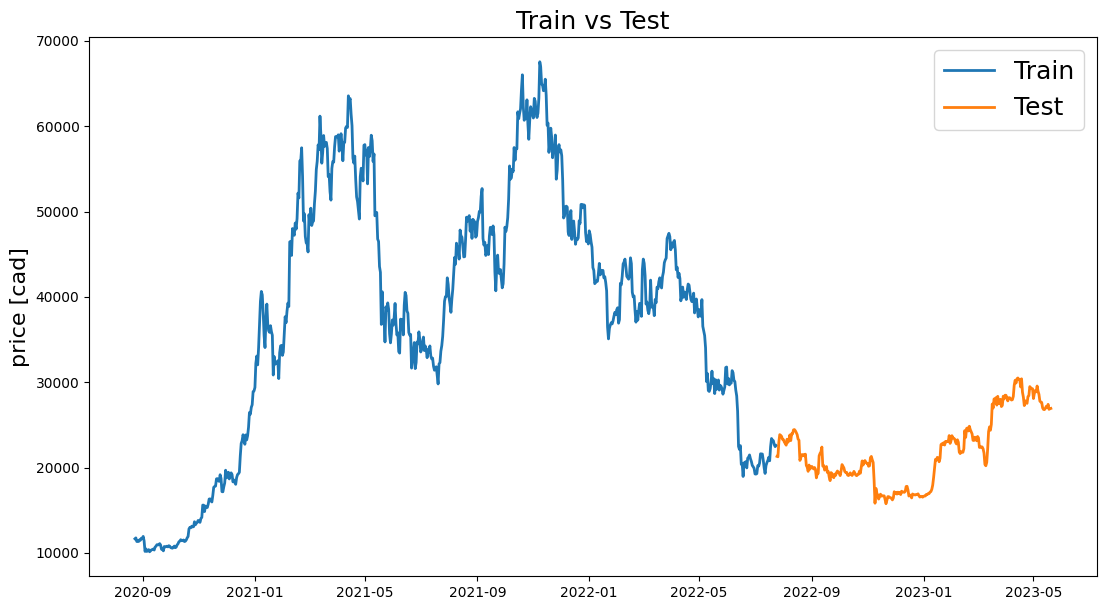

In [29]:
line_plot(train[target_col],test[target_col],'Train','Test','Train vs Test')

Normalisation

In [30]:
def normalise_zero_base(data):
  return data/data.iloc[0]-1
def normalise_min_max(data):
  return (data-data.min())/(data.max()-data.min())

Extract Window Length

In [31]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [32]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

#Building our model

In [33]:
def build_lstm_model(input_data,output_size,neurons=100,activ_func='linear',dropout=0.2,loss='mse',optimizer='adam'):
  model=Sequential()
  model.add(LSTM(neurons,input_shape=(input_data.shape[1],input_data.shape[2])))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_size))
  model.add(Activation(activ_func))
  model.compile(loss=loss,optimizer=optimizer)
  return model

In [34]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [35]:
train, test, X_train, X_test, y_train, y_test = prepare_data(df, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
25/25 [==============================] - 4s 13ms/step - loss: 0.0087
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 3/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0027
Epoch 7/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 8/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 10/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 11/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 12/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 13/20
25/25 [====================

In [36]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_pred=preds,y_true= y_test)

7/7 [==============================] - 0s 4ms/step


0.024003012220105892

In [37]:
preds.shape

(195,)

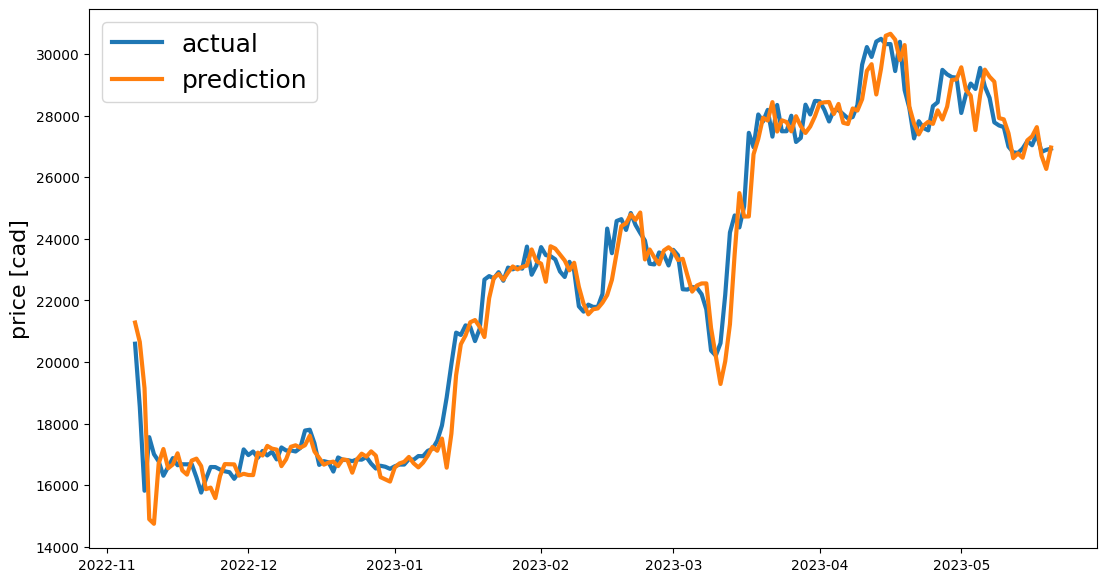

In [38]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [39]:
print(targets)

time
2022-11-07    20593.73
2022-11-08    18544.70
2022-11-09    15820.02
2022-11-10    17559.67
2022-11-11    17007.72
                ...   
2023-05-16    27036.63
2023-05-17    27404.35
2023-05-18    26821.85
2023-05-19    26887.96
2023-05-20    26927.91
Name: close, Length: 195, dtype: float64


In [40]:
print(test[target_col])

time
2022-11-02    20150.33
2022-11-03    20207.99
2022-11-04    21150.60
2022-11-05    21301.57
2022-11-06    20910.59
                ...   
2023-05-16    27036.63
2023-05-17    27404.35
2023-05-18    26821.85
2023-05-19    26887.96
2023-05-20    26927.91
Name: close, Length: 200, dtype: float64


In [41]:
test[target_col].shape[0]

200

In [42]:
test_price=pd.DataFrame((float(test[target_col][x]) for x in range(0,test[target_col].shape[0])))

In [43]:
predict_price=pd.DataFrame((float(preds[x]) for x in range(0,preds.shape[0])))

In [44]:
lstm_score=r2_score(test_price[:195],predict_price)
lstm_score*100

91.36238102093797

#Comparision with other models

In [45]:
x=df.drop(target_col,axis='columns')

In [46]:
y=df[target_col]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
forest_pred=forest.predict(x_test)

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)

In [50]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [53]:
forest_score=r2_score(y_test,forest_pred)

In [54]:
tree_score=r2_score(y_test,tree_pred)

In [55]:
svr_score=r2_score(y_test,svr_pred)

In [56]:
knr_score=r2_score(y_test,knr_pred)

In [57]:
lr_score=r2_score(y_test,lr_pred)

In [58]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [59]:
x_chart=np.array(['SVR','KNNR','LSTM'])
y_chart=np.array([svr_score,knr_score,lstm_score])

In [60]:
print(y_chart)

[-0.03173917  0.27538169  0.91362381]


<Axes: >

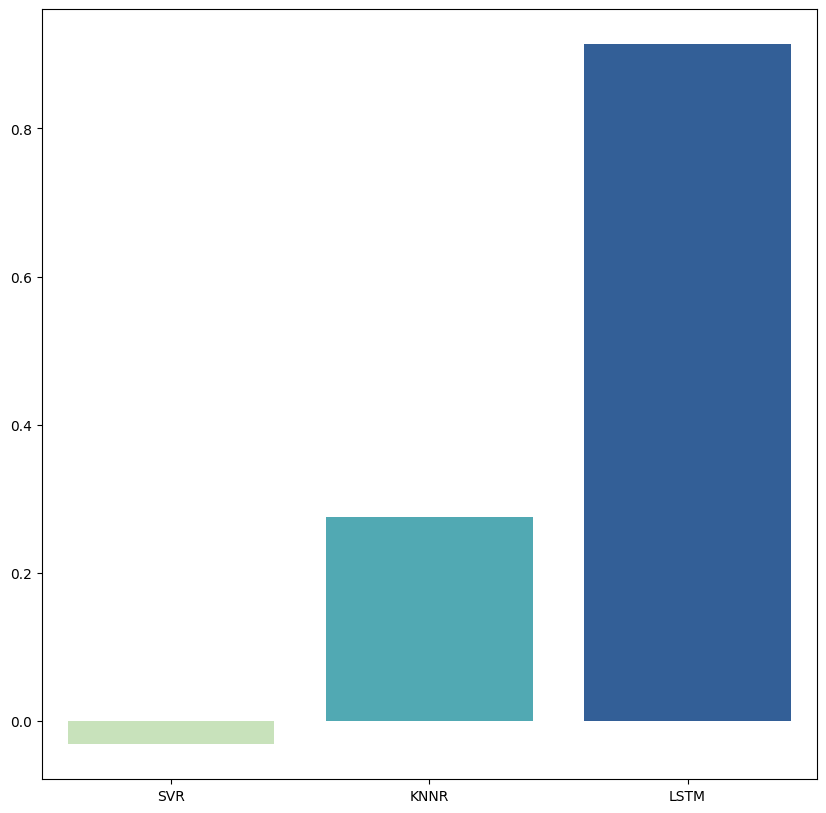

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(x=x_chart,y=y_chart,palette="YlGnBu")